## 실습 평가 과제



#### 과제 1.
아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_21
- amount_21 : price_21 * quantity_21

Q2. df를 수정하여 3가지 이상의 인사이트를 포함한 데이터셋으로 변환 후 데이터셋을 data_gen.csv 파일 로 저장하세요.




#### 과제2
data_gen.csv 파일을 불러와서 데이터셋에 대한 통계적 탐색을 수행하고 아래 예시를 참조하여 분석용 데이터셋으로서 가치를 제고하기 위한 수정작업을 하신 후 데이터셋이 포함하고 있는 특징 및 인사이트를 정리하여 기술하고 그 결과 파일을 data_rev.csv 이름으로 저장하세요.

(예시) 분석용 데이터셋 가치를 제고하기 위하여 통계적 분석 기법을 이용하여 데이터셋에 대하여 다음 인사이트가 반영되도록 데이터셋을 수정하세요.
- 가격, 구매 수량에 10개의 결측치 반영
- 가격, 구매 수량, 총 구매 금액 분포를 정규분포에 근사하도록 수정
- 성별에 따른 구매 구액의 분포에 이상치가 포함되지 않도록 수정

In [33]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

# 업로드된 파일을 데이터프레임으로 읽기
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path,index_col=0)

Saving data_rev.csv to data_rev (2).csv


## 데이터셋 수정

- 가격, 구매 수량에 10개의 결측치 반영
- 평균값과 중앙값의 차이가 큰 컬럼들의 정규분포 근사하도록 수정(age,time,quantity20,amount)

In [34]:
df

,cusid,cusno,gender,age,region,date,day,product_20,product_21,price_20,...,time_21,amount_20,amount_21,total,age_cat,time_cat21,time_cat20,year,month,days
0,1.0,1.0,0.0,65.800949,9.0,2021-11-30,Tuesday,30.0,30.0,20400.45,...,1.731932,2.163600e+06,1.294042e+06,3.457642e+06,sixties,dawn,night,2021,11,30
1,1.0,1.0,0.0,52.219651,9.0,2020-02-20,Thursday,30.0,30.0,26880.21,...,7.533426,1.144750e+06,2.595819e+06,3.740569e+06,fifties,morning,afternoon,2020,2,20
2,1.0,1.0,0.0,2.402054,9.0,2021-09-11,Saturday,30.0,20.0,18764.62,...,12.020281,1.556972e+06,5.181434e+06,6.738407e+06,childhood,afternoon,dawn,2021,9,11
3,1.0,1.0,0.0,36.272611,9.0,2021-12-19,Sunday,20.0,30.0,3092.66,...,9.924405,1.614097e+06,4.247538e+06,5.861635e+06,thirties,morning,afternoon,2021,12,19
4,1.0,1.0,0.0,50.149470,9.0,2020-12-16,Wednesday,10.0,20.0,17948.80,...,9.300455,2.179819e+06,1.309205e+06,3.489024e+06,fifties,morning,afternoon,2020,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1000.0,1000.0,0.0,12.794764,1.0,2020-12-22,Tuesday,30.0,10.0,48659.99,...,8.093043,2.008720e+06,3.237787e+06,5.246507e+06,teenagers,morning,dawn,2020,12,22
9996,1000.0,1000.0,0.0,26.305755,1.0,2020-08-01,Saturday,20.0,10.0,31289.80,...,8.946876,1.845640e+06,1.391025e+06,3.236665e+06,twenties,morning,morning,2020,8,1
9997,1000.0,1000.0,0.0,50.723343,1.0,2021-08-03,Tuesday,20.0,10.0,15851.53,...,18.058970,2.650943e+06,3.558769e+06,6.209712e+06,fifties,evening,afternoon,2021,8,3
9998,1000.0,1000.0,0.0,64.019353,1.0,2020-06-15,Monday,20.0,20.0,44765.18,...,10.094318,2.223264e+06,1.814386e+06,4.037650e+06,sixties,morning,night,2020,6,15


In [35]:
df.describe()

,cusid,cusno,gender,age,region,product_20,product_21,price_20,price_21,quantity_20,quantity_21,time_20,time_21,amount_20,amount_21,total,year,month,days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9990.000000,9990.000000,9990.000000,9990.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.00000,10000.000000
mean,498.542063,498.542063,0.727263,37.097788,5.878263,20.176763,19.949763,25372.858358,25329.475170,52.094286,50.377841,12.436407,12.204389,1.824114e+06,2.483815e+06,4.307929e+06,2020.501200,6.51030,15.654000
std,290.911140,290.911140,2.897273,19.681198,3.776335,8.236794,8.233073,14230.608099,14347.991363,26.013120,28.821409,5.513240,5.622434,1.083643e+06,1.472870e+06,1.839393e+06,0.500024,3.43783,8.811972
min,1.000000,1.000000,0.000000,0.016875,1.000000,10.000000,10.000000,37.460566,37.460566,0.002699,1.000000,0.000556,0.004462,3.746057e+01,3.746057e+01,3.746057e+01,2020.000000,1.00000,1.000000
25%,248.000000,248.000000,0.000000,22.343903,3.000000,10.000000,10.000000,13006.475000,12767.970000,33.348971,25.000000,8.611896,8.193053,9.807236e+05,1.327040e+06,3.000188e+06,2020.000000,4.00000,8.000000
50%,496.000000,496.000000,1.000000,36.763223,6.000000,20.000000,20.000000,25401.950000,25353.580000,51.595318,50.000000,12.927924,12.699191,1.758405e+06,2.378994e+06,4.218888e+06,2021.000000,7.00000,16.000000
75%,752.250000,752.250000,1.000000,50.916609,8.000000,30.000000,30.000000,37709.180000,37755.987500,70.009866,76.000000,16.427945,16.276032,2.556507e+06,3.486689e+06,5.546410e+06,2021.000000,9.00000,23.000000
max,1000.000000,1000.000000,37.460566,89.878522,37.460566,37.460566,37.460566,49998.520000,49996.220000,146.796434,100.000000,23.996306,23.989696,6.622666e+06,8.629190e+06,1.143749e+07,2021.000000,12.00000,31.000000


In [ ]:
# age : 중앙값보다 평균값이 큰걸로 보아 소수의 나이가 많은 사람이 있음
# amount20,21,total : age와 같음

In [36]:
df.isnull().sum()

cusid           0
cusno           0
gender          0
age             0
region          0
date            0
day             0
product_20      0
product_21      0
price_20       10
price_21       10
quantity_20    10
quantity_21    10
time_20         0
time_21         0
amount_20       0
amount_21       0
total           0
age_cat         0
time_cat21      0
time_cat20      0
year            0
month           0
days            0
dtype: int64

In [19]:
data = df.copy()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 기술 통계량 계산
desc_stats = data[['age','price_20','price_21','quantity_20', 'quantity_21','amount_20','amount_21']].describe()
desc_stats

,age,price_20,price_21,quantity_20,quantity_21,amount_20,amount_21
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,36.457362,25520.850391,25484.618640,51.700123,50.468400,1.764332e+06,2.370540e+06
std,22.037663,14140.577983,14260.708342,27.161672,28.887168,1.198767e+06,1.626749e+06
min,0.005129,1000.920000,1005.990000,0.010826,1.000000,2.704638e+02,4.056936e+02
25%,19.074596,13215.337500,12936.845000,31.457792,25.000000,8.039863e+05,1.034582e+06
50%,34.812117,25587.535000,25513.750000,51.038290,51.000000,1.595230e+06,2.131098e+06
75%,51.414673,37780.250000,37876.370000,70.421357,76.000000,2.532540e+06,3.425483e+06
max,127.887188,49998.520000,49996.220000,151.614939,100.000000,7.574921e+06,9.822828e+06


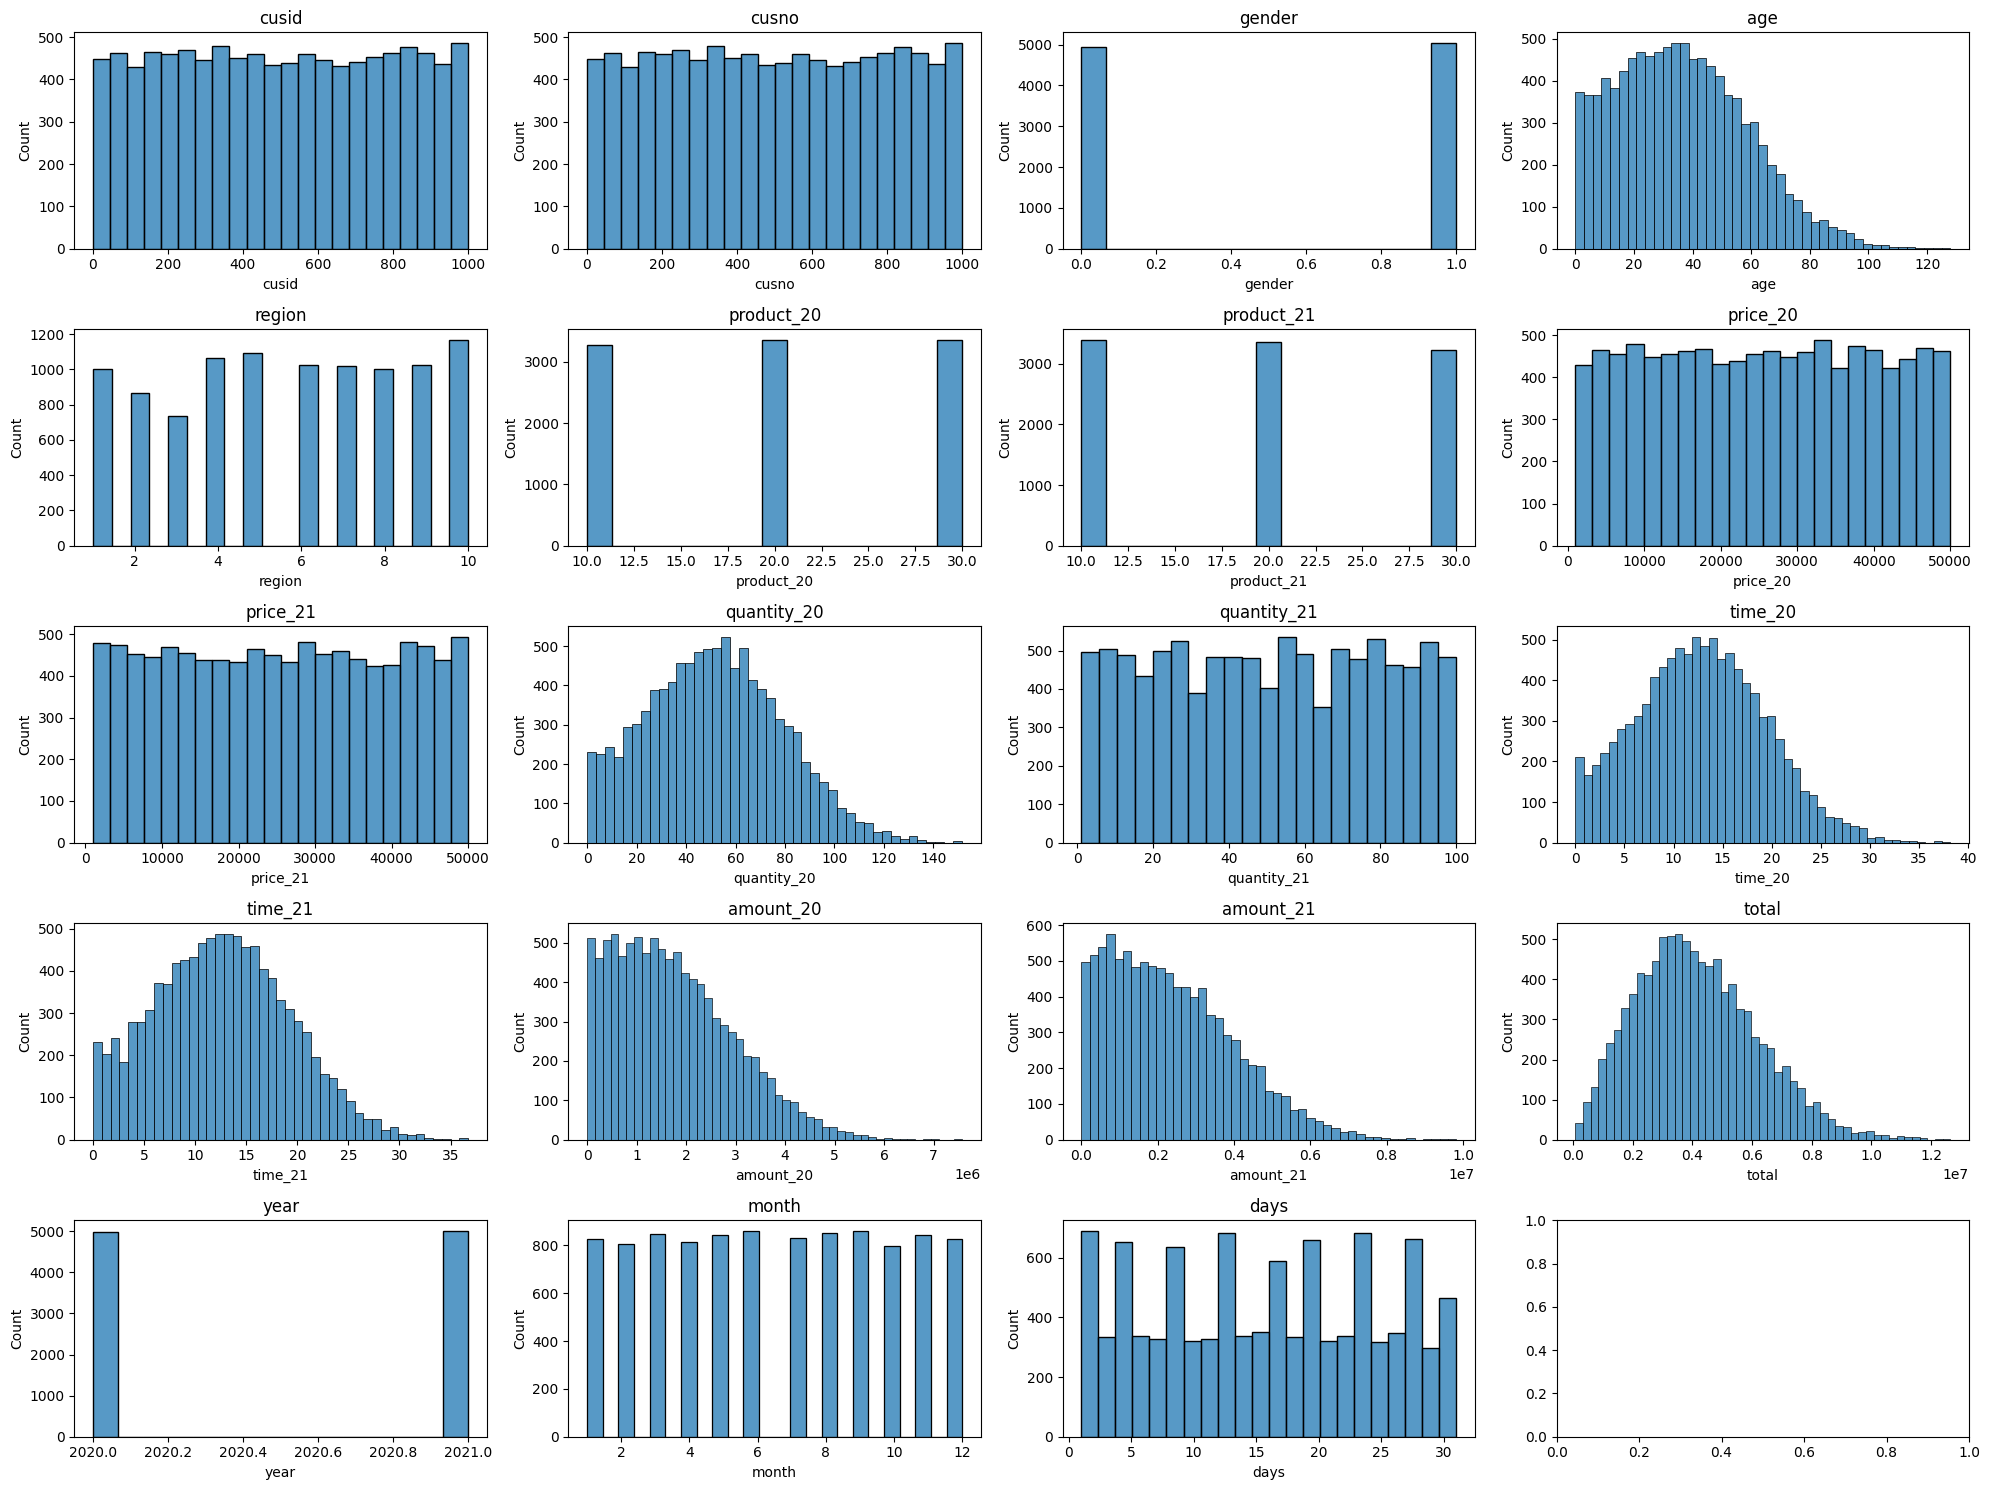

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(5, 4, figsize=(20, 15))

columns = list(data.select_dtypes(include='number').columns)

for i, column in enumerate(columns):
    row = i // 4
    col = i % 4
    sns.histplot(data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

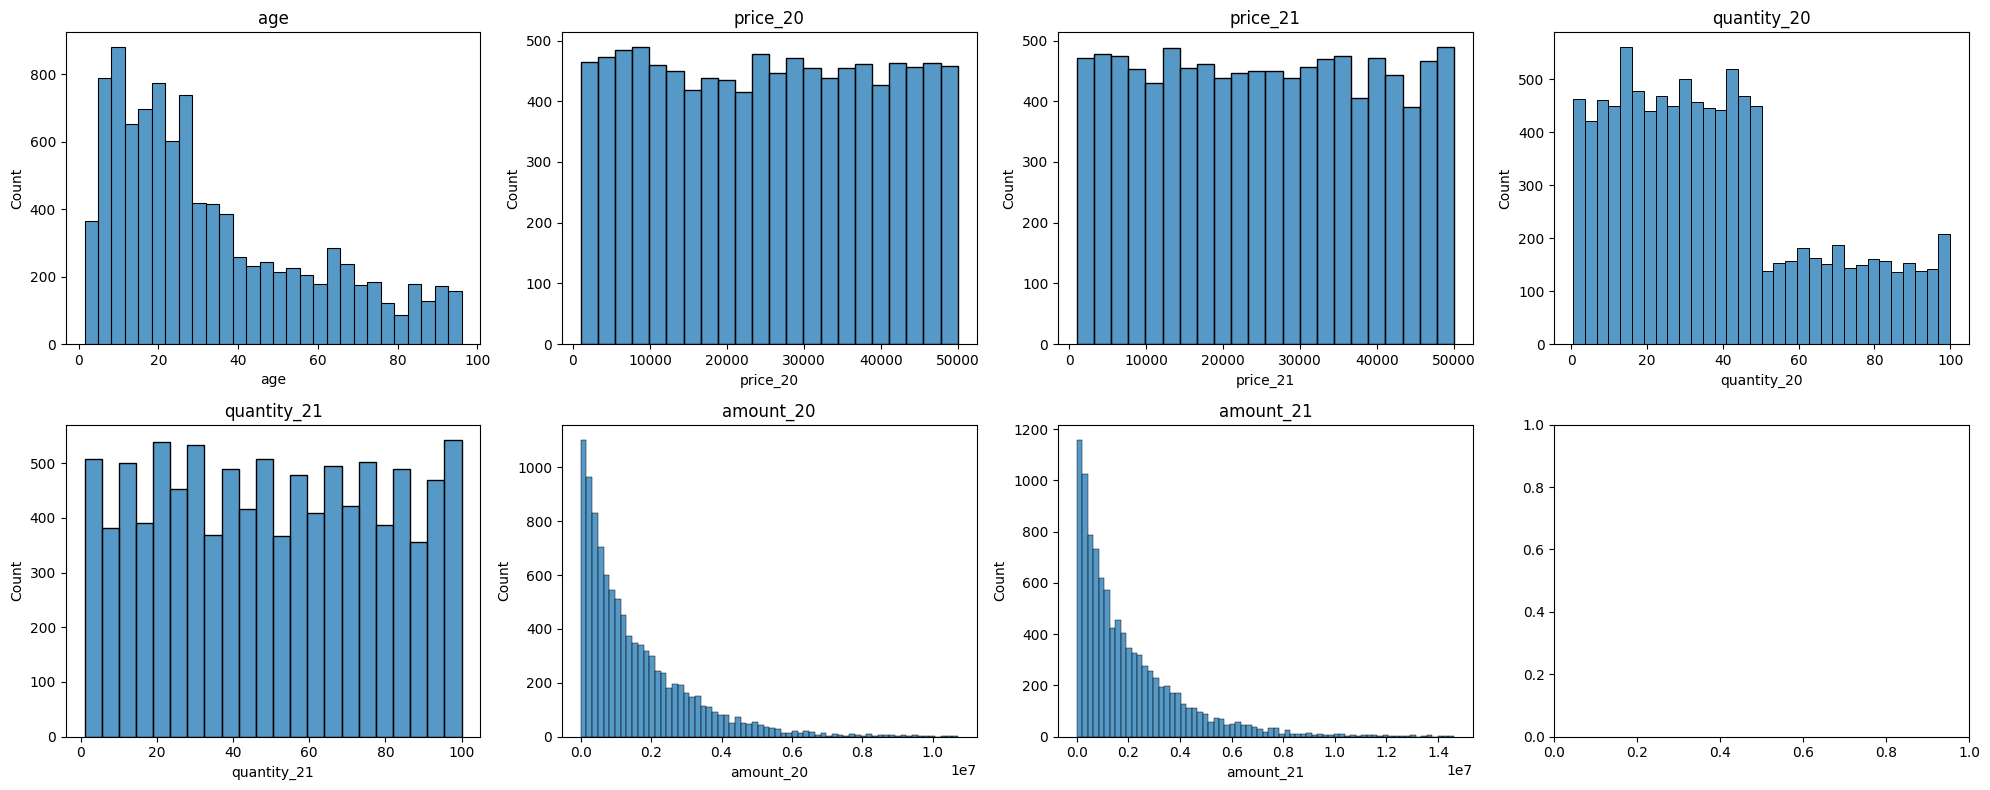

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 4, figsize=(20, 8))

columns = list(desc_stats.columns)

for i, column in enumerate(columns):
    row = i // 4
    col = i % 4
    sns.histplot(data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

In [21]:
# age, quantity_20, amount_20, amount_21 : 양의 왜곡분포
# 이 컬럼들을 정규분포에 근사하도록 수정
import pandas as pd
import numpy as np
from scipy.stats import norm

np.random.seed(10)

li = ['age','quantity_20','amount_20','amount_21']

for i in li:
    a,b = norm.fit(data[i])
    data[i] = np.random.normal(a,b,data.shape[0])
    data[i] = np.abs(data[i])

# 20년도 21년도 총 구매양 업데이트
data['total'] = data['amount_20'] + data['amount_21']

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import norm

np.random.seed(10)

li = ['time_20','time_21']

for i in li:
    a,b = norm.fit(data[i])
    data[i] = np.random.normal(a,b,data.shape[0])
    data[i] = np.abs(data[i])

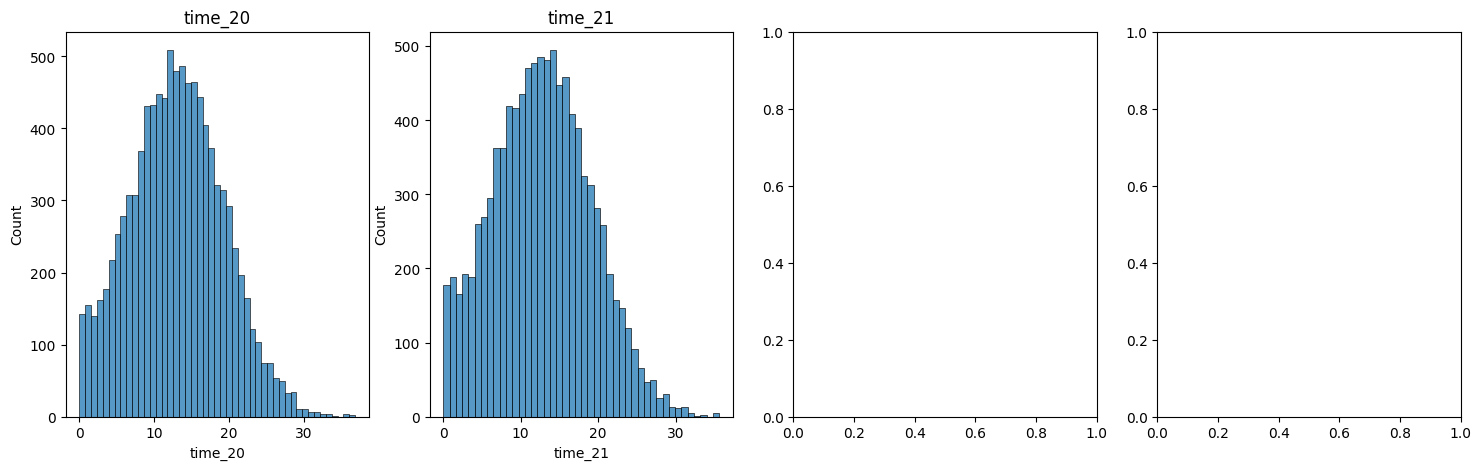

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
li = ['time_20','time_21']

for inx,col in enumerate(li):
    sns.histplot(data[col], ax=axes[inx])
    axes[inx].set_title(col)



plt.show()

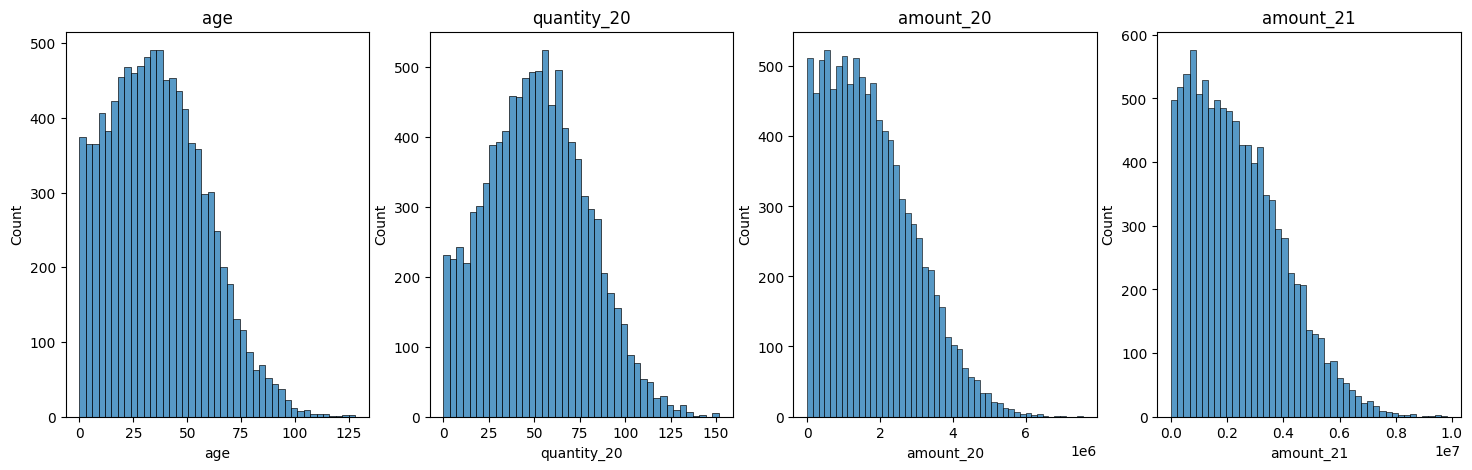

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
li = ['age','quantity_20','amount_20','amount_21']

for inx,col in enumerate(li):
    sns.histplot(data[col], ax=axes[inx])
    axes[inx].set_title(col)



plt.show()

In [ ]:
data.describe()
# age,quantity20, amount20,21,total 평균값과 중앙값의 차이가 별로 안나도록 수정 완료(데이터의 대칭성)

,cusid,cusno,gender,age,region,product_20,product_21,price_20,price_21,quantity_20,quantity_21,time_20,time_21,amount_20,amount_21,total,year,month,days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.00000,10000.000000
mean,503.190600,503.190600,0.511000,36.685317,5.537700,19.938000,19.98500,25397.171533,25348.435657,40.422651,50.182500,12.519000,12.534400,1.844167e+06,2.511175e+06,4.355341e+06,2020.501200,6.51030,15.654000
std,289.819418,289.819418,0.499904,19.786896,2.850297,8.157378,8.15576,14256.035858,14217.697704,21.767874,28.892699,6.894867,6.894155,1.085861e+06,1.475470e+06,1.827459e+06,0.500024,3.43783,8.811972
min,1.000000,1.000000,0.000000,0.011276,1.000000,10.000000,10.00000,1008.850000,1002.810000,0.009925,1.000000,1.000000,1.000000,4.827317e+02,4.286932e+02,2.620633e+04,2020.000000,1.00000,1.000000
25%,250.000000,250.000000,0.000000,21.919408,3.000000,10.000000,10.00000,12764.502500,12964.430000,23.997581,25.000000,7.000000,7.000000,9.935048e+05,1.354070e+06,3.038848e+06,2020.000000,4.00000,8.000000
50%,506.000000,506.000000,1.000000,36.014625,6.000000,20.000000,20.00000,25465.490000,25298.630000,39.758715,50.000000,13.000000,13.000000,1.772310e+06,2.405199e+06,4.251237e+06,2021.000000,7.00000,16.000000
75%,756.000000,756.000000,1.000000,50.246390,8.000000,30.000000,30.00000,37845.425000,37528.475000,55.426119,75.000000,18.000000,18.000000,2.575095e+06,3.513137e+06,5.588616e+06,2021.000000,9.00000,23.000000
max,1000.000000,1000.000000,1.000000,115.176725,10.000000,30.000000,30.00000,49988.030000,49998.830000,121.117612,100.000000,24.000000,24.000000,6.674265e+06,8.689679e+06,1.151677e+07,2021.000000,12.00000,31.000000


In [367]:
# 나이 범주 업데이트
bins = [0,10,20,30,40,50,60,70,80,90]
labels=['childhood','teenagers','twenties','thirties','forties','fifties','sixties','seventies','eighties']
# right=False 왼쪽 경계는 포함하고 오른쪽 경계는 미포함
data['age_cat'] = pd.cut(data['age'],bins=bins,labels =labels,right=False)

In [366]:
import numpy as np

over_90_indices = data[data['age'] >= 90].index

mean_age = data['age'].mean()
data.loc[over_90_indices, 'age'] = mean_age


In [365]:
# 시간 범주 업데이트
bins = [1, 6, 12, 18, 20, 24]
labels = ['dawn', 'morning', 'afternoon', 'evening', 'night']

# 1을 제외한 나머지 구간의 왼쪽 경계를 조정하여 24를 포함시킴
adjusted_bins = [0] + bins[1:]

data['time_cat21'] = pd.cut(data['time_21'], bins=adjusted_bins, labels=labels)

In [363]:
# 시간 범주 업데이트
bins = [1, 6, 12, 18, 20, 24]
labels = ['dawn', 'morning', 'afternoon', 'evening', 'night']

# 1을 제외한 나머지 구간의 왼쪽 경계를 조정하여 24를 포함시킴
adjusted_bins = [0] + bins[1:]

data['time_cat20'] = pd.cut(data['time_20'], bins=adjusted_bins, labels=labels)

In [362]:
import numpy as np

over_90_indices = data[data['time_20'] >= 24].index

mean_time = data['time_20'].mean()
data.loc[over_90_indices, 'time_20'] = mean_time


In [361]:
import numpy as np

over_90_indices = data[data['time_21'] >= 24].index

mean_time = data['time_21'].mean()
data.loc[over_90_indices, 'time_21'] = mean_time

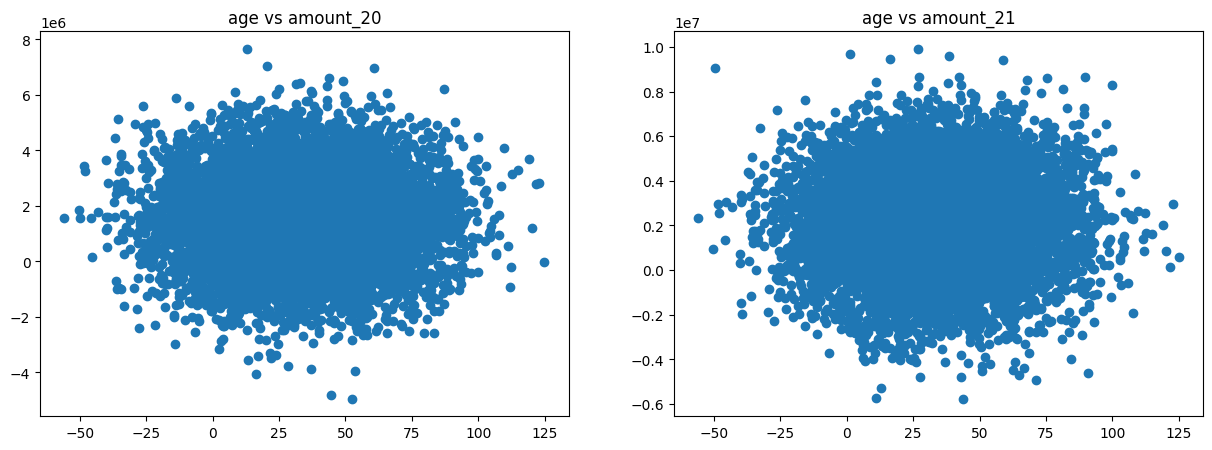

In [ ]:
# 선형관계는 없지만 가운데에 밀집되어 있으므로 나이와 구매금액은 상관관계가 있어 보임
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

x = data['age']
y = data['amount_20']
z = data['amount_21']

# 첫 번째 서브플롯에 산점도 플로팅
axes[0].scatter(x, y)
axes[0].set_title('age vs amount_20')

# 두 번째 서브플롯에 산점도 플로팅
axes[1].scatter(x, z)
axes[1].set_title('age vs amount_21')

plt.show()


In [ ]:
matrix = data[['age','gender','price_20','quantity_20','amount_20']].corr()

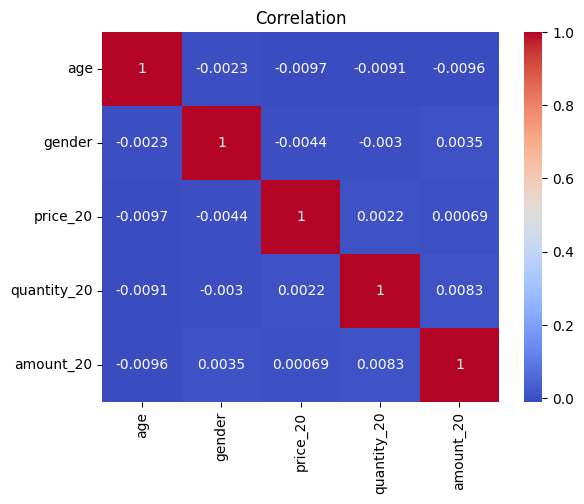

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(matrix, annot=True, cmap = 'coolwarm')
plt.title("Correlation")
plt.show()


In [325]:
# 가격, 구매 수량에 10개의 결측치 반영
import numpy as np
data.loc[data.sample(10).index, 'price_20'] = np.nan
data.loc[data.sample(10).index, 'price_21'] = np.nan
data.loc[data.sample(10).index, 'quantity_20'] = np.nan
data.loc[data.sample(10).index, 'quantity_21'] = np.nan

#### 과제3.
Q1. data_rev.csv를 불러와서 추가적으로 의미있는 3개의 인사이트를 반영한 후 탐색적 분석을 통하여 그 내용을 통계적 시각적으로 도출하고 인사이트가 반영되었는지 여부를 기술하시고 data_analysis.csv로 저장하세요.

Q2. data_analysis.csv를 기반으로 아래 예시를 참조하여 새로운 분석 과제를 정의한 후 그 과제에 적합한 분석용 데이터셋을 만든 후 과제에 적합한 이유 및 특징을 기술하고 data_obj.csv로 저장하세요.

(예시)고객별 구매감소 원인을 파악하기 위한 분석형 데이터셋을 생성한 후 탐색적 분석을 수행.(거래기준 데이터 -> 고객기준 데이터로 변환)

In [356]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

# 업로드된 파일을 데이터프레임으로 읽기
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path,index_col=0)

Saving data_revr.csv to data_revr (2).csv


In [357]:
data = df.copy()

In [358]:
data.isnull().sum()

cusid           0
cusno           0
gender          0
age             0
region          0
date            0
day             0
product_20      0
product_21      0
price_20       10
price_21       10
quantity_20    10
quantity_21    10
time_20         0
time_21         0
amount_20       0
amount_21       0
total           0
age_cat         0
time_cat21      0
time_cat20      0
year            0
month           0
days            0
dtype: int64

In [354]:
data

,cusid,cusno,gender,age,region,date,day,product_20,product_21,price_20,...,time_21,amount_20,amount_21,total,age_cat,time_cat21,time_cat20,year,month,days
0,1.0,1.0,0.0,65.800949,9.0,2021-11-30,Tuesday,30.0,30.0,20400.45,...,1.731932,2.163600e+06,1.294042e+06,3.457642e+06,sixties,dawn,night,2021,11,30
1,1.0,1.0,0.0,52.219651,9.0,2020-02-20,Thursday,30.0,30.0,26880.21,...,7.533426,1.144750e+06,2.595819e+06,3.740569e+06,fifties,morning,afternoon,2020,2,20
2,1.0,1.0,0.0,2.402054,9.0,2021-09-11,Saturday,30.0,20.0,18764.62,...,12.020281,1.556972e+06,5.181434e+06,6.738407e+06,childhood,afternoon,dawn,2021,9,11
3,1.0,1.0,0.0,36.272611,9.0,2021-12-19,Sunday,20.0,30.0,3092.66,...,9.924405,1.614097e+06,4.247538e+06,5.861635e+06,thirties,morning,afternoon,2021,12,19
4,1.0,1.0,0.0,50.149470,9.0,2020-12-16,Wednesday,10.0,20.0,17948.80,...,9.300455,2.179819e+06,1.309205e+06,3.489024e+06,fifties,morning,afternoon,2020,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1000.0,1000.0,0.0,12.794764,1.0,2020-12-22,Tuesday,30.0,10.0,48659.99,...,8.093043,2.008720e+06,3.237787e+06,5.246507e+06,teenagers,morning,dawn,2020,12,22
9996,1000.0,1000.0,0.0,26.305755,1.0,2020-08-01,Saturday,20.0,10.0,31289.80,...,8.946876,1.845640e+06,1.391025e+06,3.236665e+06,twenties,morning,morning,2020,8,1
9997,1000.0,1000.0,0.0,50.723343,1.0,2021-08-03,Tuesday,20.0,10.0,15851.53,...,18.058970,2.650943e+06,3.558769e+06,6.209712e+06,fifties,evening,afternoon,2021,8,3
9998,1000.0,1000.0,0.0,64.019353,1.0,2020-06-15,Monday,20.0,20.0,44765.18,...,10.094318,2.223264e+06,1.814386e+06,4.037650e+06,sixties,morning,night,2020,6,15


In [297]:
data.describe()

,cusid,cusno,gender,age,region,product_20,product_21,price_20,price_21,quantity_20,quantity_21,time_20,time_21,amount_20,amount_21,total,year,month,days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9990.000000,9990.000000,9990.000000,9990.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.00000,10000.000000
mean,501.701000,501.701000,0.504800,35.590602,5.687000,20.07900,19.836000,25519.799885,25481.747511,51.690212,50.458959,12.185498,11.987720,1.764332e+06,2.370540e+06,4.134872e+06,2020.501200,6.51030,15.654000
std,289.599667,289.599667,0.500002,20.752567,2.878308,8.14803,8.144921,14140.163308,14255.218497,27.166994,28.889246,5.685394,5.773282,1.198767e+06,1.626749e+06,2.018186e+06,0.500024,3.43783,8.811972
min,1.000000,1.000000,0.000000,0.005129,1.000000,10.00000,10.000000,1000.920000,1005.990000,0.010826,1.000000,0.006143,0.015057,2.704638e+02,4.056936e+02,7.476382e+04,2020.000000,1.00000,1.000000
25%,252.750000,252.750000,0.000000,19.074596,3.000000,10.00000,10.000000,13216.532500,12940.197500,31.435570,25.000000,8.133096,7.766829,8.039863e+05,1.034582e+06,2.638344e+06,2020.000000,4.00000,8.000000
50%,500.000000,500.000000,1.000000,34.812117,6.000000,20.00000,20.000000,25585.600000,25513.750000,51.017493,51.000000,12.718523,12.480145,1.595230e+06,2.131098e+06,3.937716e+06,2021.000000,7.00000,16.000000
75%,754.000000,754.000000,1.000000,50.366654,8.000000,30.00000,30.000000,37778.007500,37844.290000,70.415043,76.000000,16.346288,16.211923,2.532540e+06,3.425483e+06,5.434132e+06,2021.000000,9.00000,23.000000
max,1000.000000,1000.000000,1.000000,89.962039,10.000000,30.00000,30.000000,49998.520000,49996.220000,151.614939,100.000000,23.999926,23.999685,7.574921e+06,9.822828e+06,1.263997e+07,2021.000000,12.00000,31.000000


In [329]:
data.to_csv('data_revr.csv')

In [359]:
data.product_20.value_counts()

product_20
20    3361
30    3359
10    3280
Name: count, dtype: int64

In [368]:
# insight 1 : 연령대별 어느 시간대에 많이 구매했는지
# 연령대별 선호하는 시간대를 파악해 이벤트 시간 조정
age_by_time = data.pivot_table(index='age_cat',columns='time_cat20',values='cusid',aggfunc='count')
age_by_time

time_cat20,dawn,morning,afternoon,evening,night
age_cat,,,,,
childhood,1254,0,0,0,0
teenagers,261,1116,0,0,0
twenties,107,1465,0,0,0
thirties,10,341,1428,0,0
forties,0,12,1461,0,0
fifties,0,2,494,640,0
sixties,0,0,0,144,662
seventies,0,0,124,0,278
eighties,0,0,201,0,0


In [306]:
age_by_time1 = data.pivot_table(index='age_cat',columns='time_cat21',values='cusid',aggfunc='count')
age_by_time1

time_cat21,dawn,morning,afternoon,evening,night
age_cat,,,,,
childhood,227,370,455,80,122
teenagers,237,388,523,103,126
twenties,271,478,575,111,137
thirties,295,525,651,132,176
forties,267,431,525,107,143
fifties,192,335,410,79,120
sixties,135,263,274,61,73
seventies,66,123,134,39,40
eighties,39,68,74,10,10


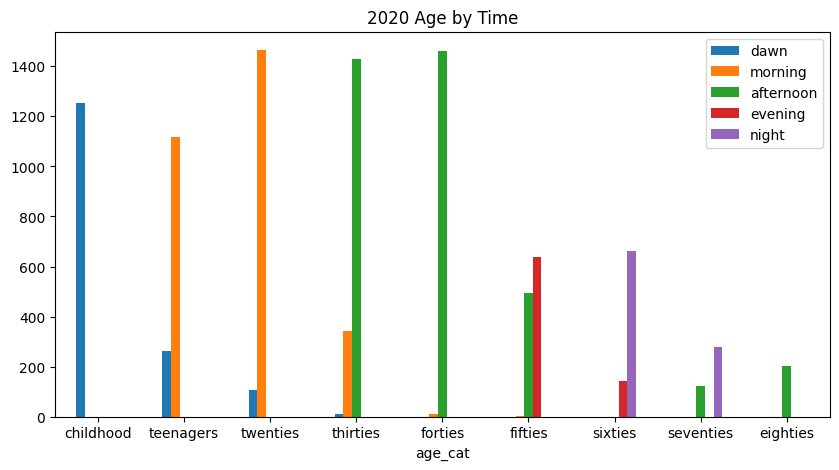

In [307]:
import matplotlib.pyplot as plt

age_by_time.plot(kind ='bar',figsize=(10,5))
plt.title('2020 Age by Time')
plt.xticks(rotation=0)
plt.legend()
plt.show()

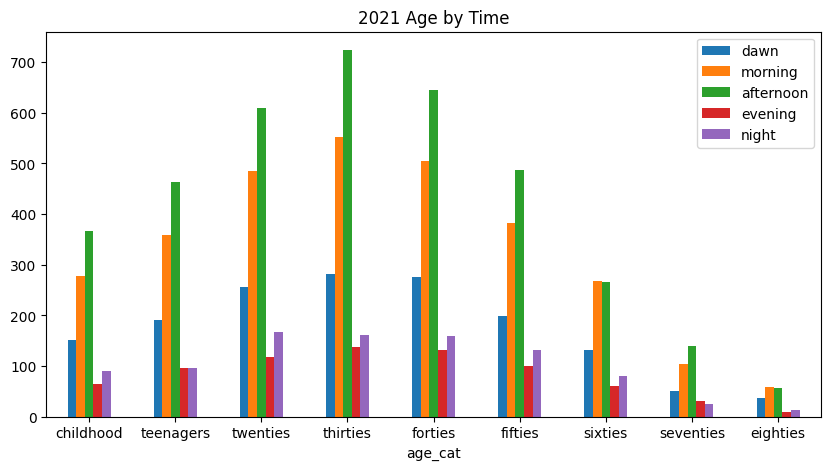

In [244]:
import matplotlib.pyplot as plt

age_by_time1.plot(kind ='bar',figsize=(10,5))
plt.title('2021 Age by Time')
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [245]:
# 간편하게 보기위해서 시간 범주형으로 나이 평균
time_by_age = data.pivot_table(index='time_cat20',values='age',aggfunc='mean')
time_by_age

,age
time_cat20,
dawn,7.891327
morning,24.437329
afternoon,46.516642
evening,57.167534
night,66.310947


In [246]:
time_by_age1 = data.pivot_table(index ='time_cat21',values = 'age', aggfunc='mean')
time_by_age1

,age
time_cat21,
dawn,37.206827
morning,37.539948
afternoon,36.609412
evening,37.565835
night,37.088647


In [247]:

time_by_age1.index.rename('time_cat20',inplace=True)
combined_time_by_age = pd.merge(time_by_age,time_by_age1,left_index=True, right_index=True)

combined_time_by_age.index.name = 'time_cat'
combined_time_by_age.columns=['20 age mean','21 age mean']
combined_time_by_age

,20 age mean,21 age mean
time_cat,,
dawn,7.891327,37.206827
morning,24.437329,37.539948
afternoon,46.516642,36.609412
evening,57.167534,37.565835
night,66.310947,37.088647


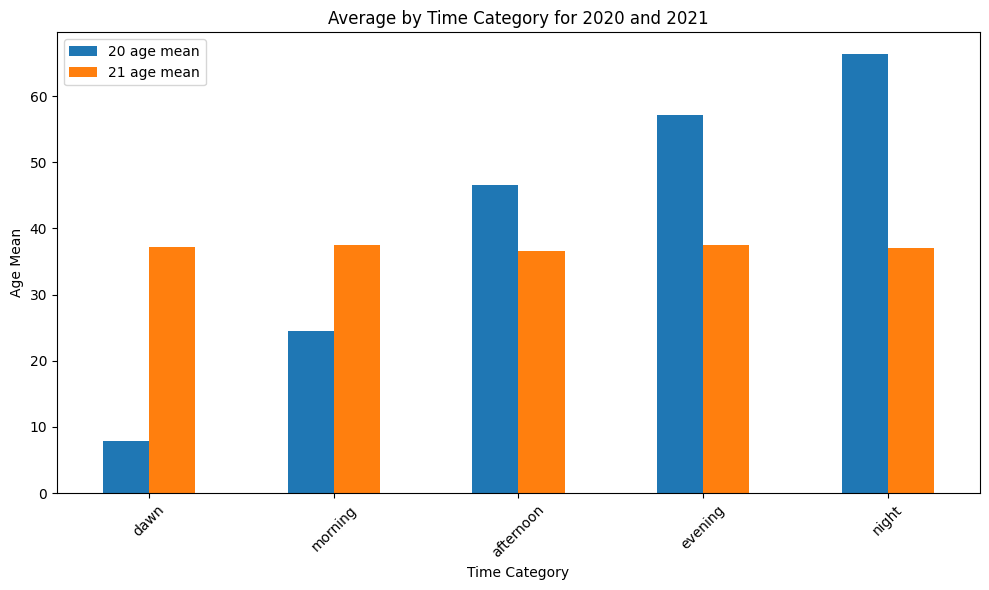

In [248]:
combined_time_by_age.plot(kind='bar', figsize=(10, 6))

# 그래프 제목 및 레이블 설정
plt.title('Average by Time Category for 2020 and 2021')
plt.xlabel('Time Category')
plt.ylabel('Age Mean')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [ ]:
# 원하는 인사이트를 위한 수정
# (20년도) 새벽에 나이 평균이 너무 낮고 밤에는 나이 평균이 너무 높다
# 새벽나이대의 평균을 올리고, 밤에 나이 평균을 낮추기

In [369]:
def age_time(x):
    if x['age'] <10:
        return x['time_20'] * 4
    elif 60 < x['age'] <= 80:
        return x['time_20'] * 0.5
    else:
        return x['time_20']

data['time_20'] = data.apply(lambda x: age_time(x), axis = 1)

In [370]:
# 시간별 시간 범주 업데이트
bins = [1, 6, 12, 18, 20, 24]
labels = ['dawn', 'morning', 'afternoon', 'evening', 'night']

# 1을 제외한 나머지 구간의 왼쪽 경계를 조정하여 24를 포함시킴
adjusted_bins = [0] + bins[1:]

data['time_cat20'] = pd.cut(data['time_20'], bins=adjusted_bins, labels=labels)

In [371]:
data.groupby('age_cat').time_20.mean()

age_cat
childhood    15.182678
teenagers     6.184581
twenties      9.630312
thirties     12.693113
forties      15.474725
fifties      18.173920
sixties      10.430124
seventies     9.980811
eighties     12.842635
Name: time_20, dtype: float64

In [251]:
# 변경된 연령대별 시간 평균
data.groupby('age_cat').time_20.mean()
# 의도한 바대로 20년도의 10대 이하들의 구매한 시간 평균을 올랐으며,
# 60~70대의 구매한 시간 평균은 줄어들었다

age_cat
childhood    11.200210
teenagers     6.109272
twenties      9.412161
thirties     12.440956
forties      15.330732
fifties      18.245103
sixties      10.553812
seventies     9.223418
eighties     13.028207
Name: time_20, dtype: float64

In [373]:

age_by_time = data.pivot_table(index='age_cat',columns='time_cat20',values='cusid',aggfunc='count')
age_by_time

time_cat20,dawn,morning,afternoon,evening,night
age_cat,,,,,
childhood,125,249,385,168,327
teenagers,261,1116,0,0,0
twenties,107,1465,0,0,0
thirties,10,341,1428,0,0
forties,0,12,1461,0,0
fifties,0,2,494,640,0
sixties,0,806,0,0,0
seventies,0,402,0,0,0
eighties,0,0,201,0,0


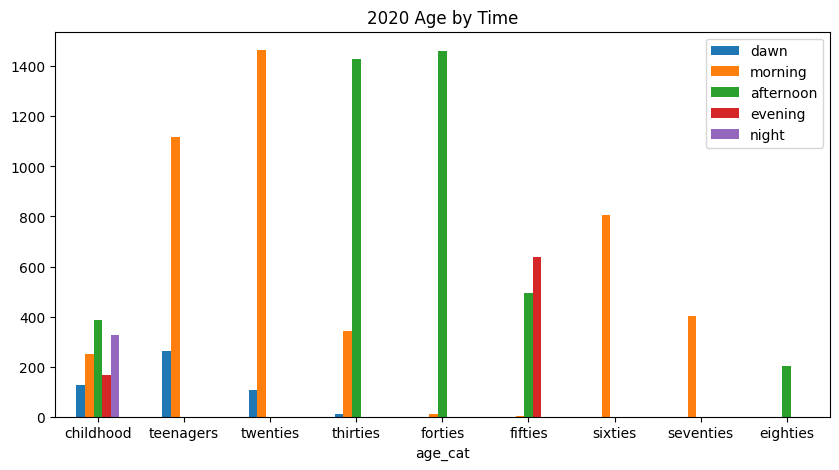

In [374]:
# 변경된 사항을 포함하여 다시 그린 그래프
import matplotlib.pyplot as plt

age_by_time.plot(kind ='bar',figsize=(10,5))
plt.title('2020 Age by Time')
plt.xticks(rotation=0)
plt.legend()
plt.show()


In [258]:
# insight 2 : 작년에 비해 가격이 떨어진 상품
# 상품가치 파악
pro_price = data.pivot_table(index='product_20',values=['price_20']).round(2)
pro_price = pro_price.rename_axis('product')
pro_price

,price_20
product,
10.000000,25266.49
20.000000,25606.47
30.000000,25691.55
37.460566,37.46


In [259]:
pro_price1 = data.pivot_table(index='product_21',values=['price_21']).round(2)
pro_price1 = pro_price1.rename_axis('product')
pro_price1

,price_21
product,
10.000000,25460.36
20.000000,25659.84
30.000000,25320.96
37.460566,37.46


In [123]:
product_price = pd.merge(pro_price,pro_price1,left_index=True, right_index=True)
product_price

,price_20,price_21
product,,
10,25254.49,25460.53
20,25608.62,25660.59
30,25693.13,25327.00


In [ ]:
# 20년도는 코로나가 시작한 년도라 저가 상품인 30의 수요가 높고 10의 수요가 낮으며
# 21년도는 그보다 상황이 나아져 그 반대가 되도록 수정할려고 했으나
# 그래프를 그려본 결과 원하는 의도대로 인사이트가 도출되었다

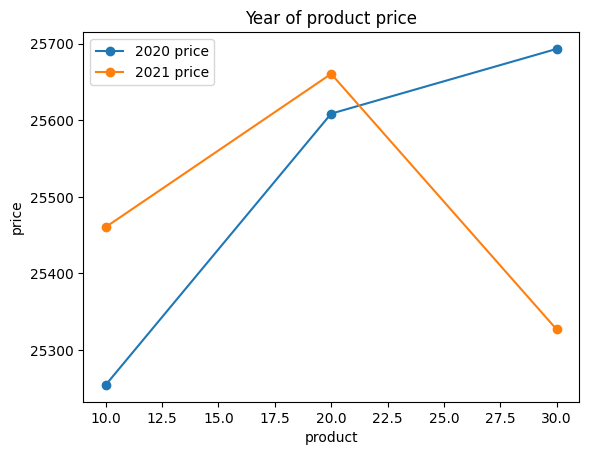

In [125]:
plt.plot(product_price.index,product_price['price_20'], marker ='o',label='2020 price')
plt.plot(product_price.index,product_price['price_21'],marker='o',label='2021 price')
plt.title('Year of product price')
plt.xlabel('product')
plt.ylabel('price')
plt.legend()
plt.show()

In [265]:
data

,cusid,cusno,gender,age,region,date,day,product_20,product_21,price_20,...,time_21,amount_20,amount_21,total,age_cat,time_cat21,time_cat20,year,month,days
0,1.0,1.0,0.0,65.800949,9.0,2021-11-30,Tuesday,30.0,30.0,20400.45,...,1.731932,2.163600e+06,1.294042e+06,3.457642e+06,sixties,dawn,night,2021,11,30
1,1.0,1.0,0.0,52.219651,9.0,2020-02-20,Thursday,30.0,30.0,26880.21,...,7.533426,1.144750e+06,2.595819e+06,3.740569e+06,fifties,morning,afternoon,2020,2,20
2,1.0,1.0,0.0,2.402054,9.0,2021-09-11,Saturday,30.0,20.0,18764.62,...,12.020281,1.556972e+06,5.181434e+06,6.738407e+06,childhood,afternoon,dawn,2021,9,11
3,1.0,1.0,0.0,36.272611,9.0,2021-12-19,Sunday,20.0,30.0,3092.66,...,9.924405,1.614097e+06,4.247538e+06,5.861635e+06,thirties,morning,afternoon,2021,12,19
4,1.0,1.0,0.0,50.149470,9.0,2020-12-16,Wednesday,10.0,20.0,17948.80,...,9.300455,2.179819e+06,1.309205e+06,3.489024e+06,fifties,morning,afternoon,2020,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1000.0,1000.0,0.0,12.794764,1.0,2020-12-22,Tuesday,30.0,10.0,48659.99,...,8.093043,2.008720e+06,3.237787e+06,5.246507e+06,teenagers,morning,dawn,2020,12,22
9996,1000.0,1000.0,0.0,26.305755,1.0,2020-08-01,Saturday,20.0,10.0,31289.80,...,8.946876,1.845640e+06,1.391025e+06,3.236665e+06,twenties,morning,morning,2020,8,1
9997,1000.0,1000.0,0.0,50.723343,1.0,2021-08-03,Tuesday,20.0,10.0,15851.53,...,18.058970,2.650943e+06,3.558769e+06,6.209712e+06,fifties,evening,afternoon,2021,8,3
9998,1000.0,1000.0,0.0,64.019353,1.0,2020-06-15,Monday,20.0,20.0,44765.18,...,10.094318,2.223264e+06,1.814386e+06,4.037650e+06,sixties,morning,night,2020,6,15


In [266]:
# insight 3 : 시간대별 가장 많이 팔리는 상품(고가,중가,저가)
product_by_time = data.pivot_table(index='time_cat20',columns='product_20',values='cusid',aggfunc = 'count')
# product_by_time.columns = ['p10','p20','p30']
product_by_time

product_20,10.000000,20.000000,30.000000,37.460566
time_cat20,,,,
afternoon,1249.0,1279.0,1270.0,60.0
dawn,497.0,469.0,469.0,NaN
evening,272.0,273.0,269.0,NaN
morning,977.0,987.0,1009.0,NaN
night,271.0,328.0,321.0,NaN


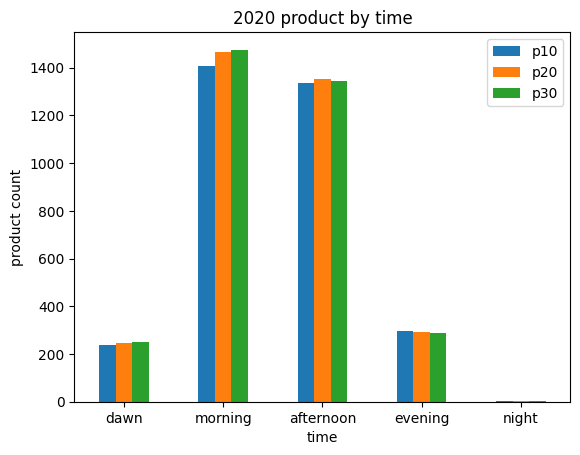

In [170]:
product_by_time.plot(kind='bar')
plt.title('2020 product by time')
plt.xlabel('time')
plt.ylabel('product count')
plt.xticks(rotation=0)
plt.show()

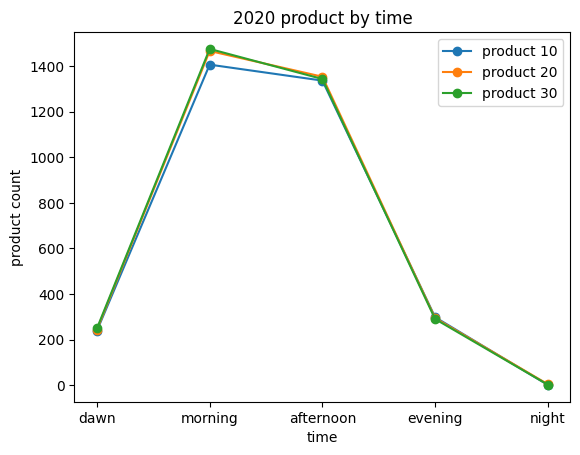

In [182]:
plt.plot(product_by_time.index, product_by_time['p10'],marker ='o',label='product 10')
plt.plot(product_by_time.index, product_by_time['p20'],marker ='o', label = 'product 20')
plt.plot(product_by_time.index, product_by_time['p30'],marker ='o',label = 'product 30')
plt.title('2020 product by time')
plt.xlabel('time')
plt.ylabel('product count')
plt.legend()
plt.show()
# 2020년도에는 모든 제품이 아침 ~오후에 많이 팔리는 걸 볼 수 있다

In [177]:
product_by_time1 = data.pivot_table(index='time_cat21',columns='product_21',values='cusid',aggfunc = 'count')
product_by_time1.columns =['p10','p20','p30']
product_by_time1

,p10,p20,p30
time_cat21,,,
dawn,505,535,538
morning,1066,995,954
afternoon,1281,1257,1187
evening,254,250,251
night,294,327,306


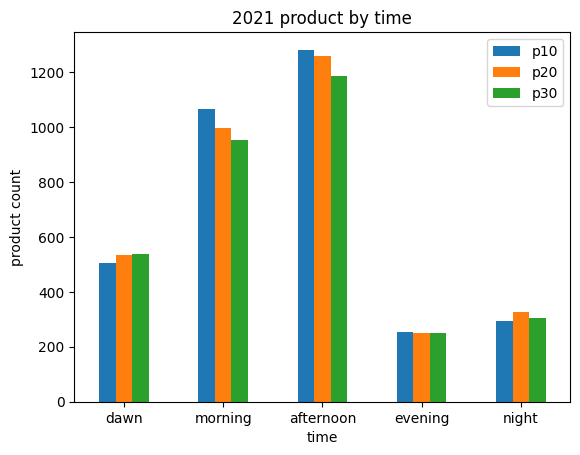

In [178]:
product_by_time1.plot(kind='bar')
plt.title('2021 product by time')
plt.xlabel('time')
plt.ylabel('product count')
plt.xticks(rotation=0)
plt.show()

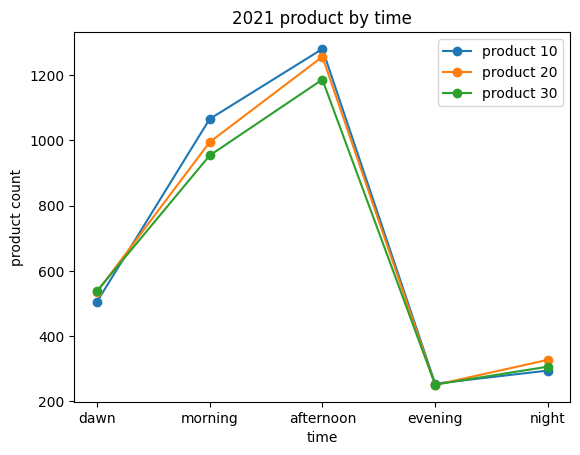

In [183]:
plt.plot(product_by_time1.index, product_by_time1['p10'],marker ='o',label='product 10')
plt.plot(product_by_time1.index, product_by_time1['p20'],marker ='o', label = 'product 20')
plt.plot(product_by_time1.index, product_by_time1['p30'],marker ='o',label = 'product 30')
plt.title('2021 product by time')
plt.xlabel('time')
plt.ylabel('product count')
plt.legend()
plt.show()
# 근소한 차이가 있지만 2021년도에도 모든 제품이 아침 ~ 오후에 많이 팔리는 걸 볼 수 있다

In [376]:
# 2020년도에는 코로나로 인해 활동량이 없으므로 모든 시간대 구매율이 비슷하게 수정
def product_time(x):
    if x['year'] == 2020:
        if x['time_cat20'] == 'morning':
            return x['time_20'] * 3
        elif x['time_cat20'] == 'afternoom':
            return x['time_20'] * 1.2
data['time_20'] = data.apply(lambda x: age_time(x), axis = 1)

In [379]:
product_by_time = data.pivot_table(index='time_cat20',columns='product_20',values='cusid',aggfunc = 'count')
product_by_time.columns = ['p10','p20','p30']
product_by_time

,p10,p20,p30
time_cat20,,,
dawn,495,554,537
morning,970,992,1000
afternoon,1207,1213,1219
evening,218,213,223
night,11,7,12


In [196]:
data[['time_cat20','time_20']]

,time_cat20,time_20
0,dawn,1.344037
1,afternoon,17.495521
2,NaN,714.192482
3,afternoon,12.788098
4,afternoon,16.884422
...,...,...
9995,dawn,5.857649
9996,morning,9.845972
9997,afternoon,17.053824
9998,dawn,1.311168


In [202]:
17.999*1.3

23.398699999999998

In [377]:
# 시간별 시간 범주 업데이트
bins = [1, 6, 12, 18, 20, 24]
labels = ['dawn', 'morning', 'afternoon', 'evening', 'night']

# 1을 제외한 나머지 구간의 왼쪽 경계를 조정하여 24를 포함시킴
adjusted_bins = [0] + bins[1:]

data['time_cat20'] = pd.cut(data['time_20'], bins=adjusted_bins, labels=labels)

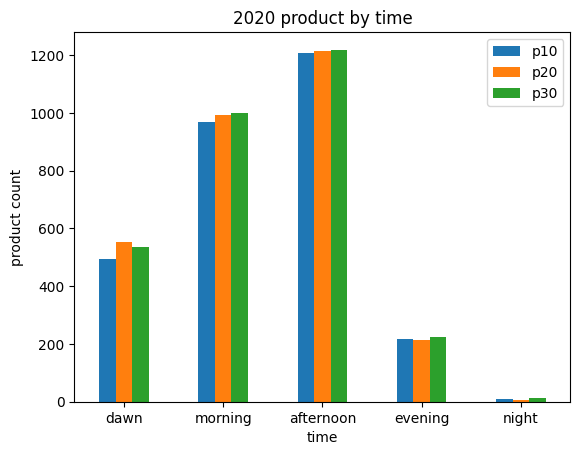

In [380]:
product_by_time.plot(kind='bar')
plt.title('2020 product by time')
plt.xlabel('time')
plt.ylabel('product count')
plt.xticks(rotation=0)
plt.show()

In [381]:
# 연령대별 어느 상품을 많이 구매했는지
# 20년도와 21년도 비교하여 어느 상품이 구매율이 떨어지고 올랐는지 원인 파악을 위해
# 거래 기준 데이터 => 고객 기준(연령대별) 데이터로 변환
pro20_age = data.pivot_table(index='age_cat',columns='product_20',values='cusid',aggfunc='count')
pro20_age

product_20,10,20,30
age_cat,,,
childhood,437,410,407
teenagers,442,458,477
twenties,523,521,528
thirties,590,583,606
forties,480,516,477
fifties,377,373,386
sixties,242,291,273
seventies,128,140,134
eighties,61,69,71


In [382]:
pro21_age = data.pivot_table(index='age_cat',columns='product_21',values='cusid',aggfunc='count')
pro21_age

product_21,10,20,30
age_cat,,,
childhood,426,405,423
teenagers,480,454,443
twenties,512,523,537
thirties,598,629,552
forties,488,493,492
fifties,391,382,363
sixties,301,269,236
seventies,141,132,129
eighties,63,77,61


In [ ]:
df_age_cat = data.groupby('age_cat').agg({
    'gender': 'first',
    'region': 'first',
    'amount': [
        lambda x: x[(data['year'] == 2020) & (data['product'] == 10)].sum(),
        lambda x: x[(data['year'] == 2020) & (data['product'] == 20)].sum(),
        lambda x: x[(data['year'] == 2020) & (data['product'] == 30)].sum(),
        lambda x: x[(data['year'] == 2021) & (data['product'] == 10)].sum(),
        lambda x: x[(data['year'] == 2021) & (data['product'] == 20)].sum(),
        lambda x: x[(data['year'] == 2021) & (data['product'] == 30)].sum(),
    ]
})

In [383]:
data.to_csv('data_analysis.csv')